<a href="https://colab.research.google.com/github/Bendron8/Statistic-Analysis-/blob/main/C%C3%B3digos_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 1**

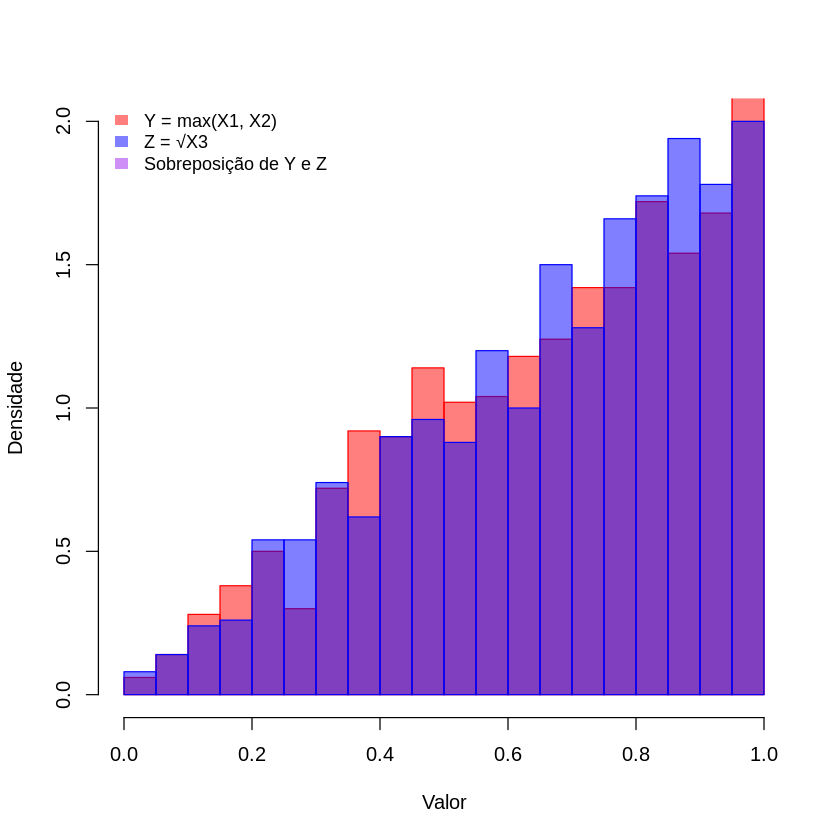

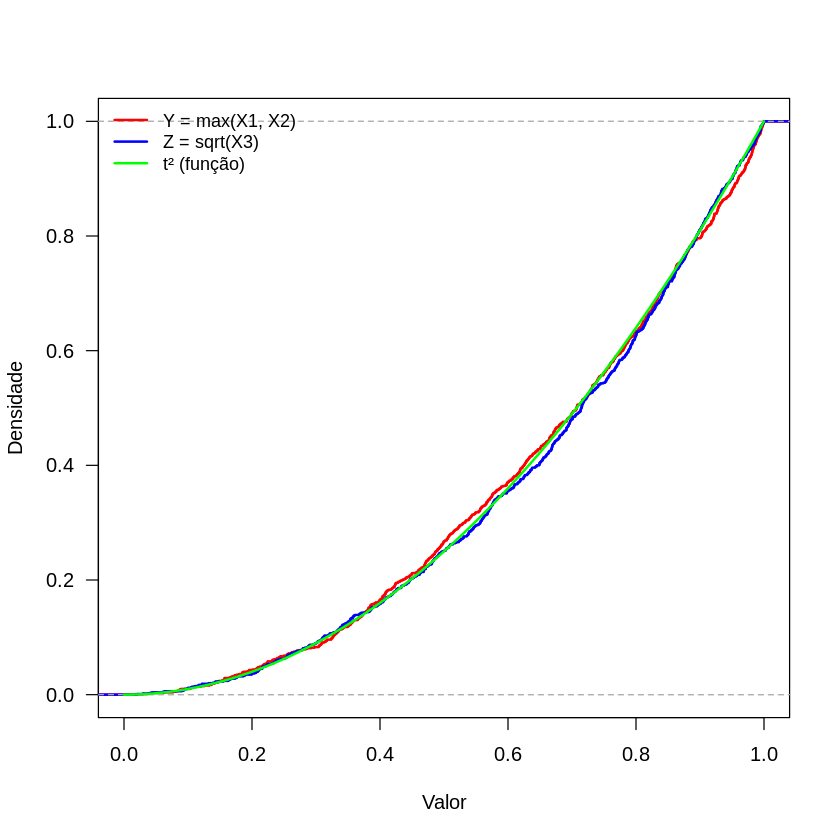

In [ ]:
# Questão 1

# Definir tamanho da amostra
m <- 1000

# Gerar variáveis aleatórias uniformes
X_1 <- runif(m, 0, 1)
X_2 <- runif(m, 0, 1)
X_3 <- runif(m, 0, 1)

# Criar as variáveis Y e Z
Y <- pmax(X_1, X_2)
Z <- sqrt(X_3)

# Criar a função t^2 para referência
t <- seq(0, 1, length.out = 1000)
t2 <- t^2

# ---- Gráfico 1: Histogramas ----
hist(Y, breaks = 30, probability = TRUE, col = adjustcolor("red", alpha.f = 0.5),
     main = "", xlab = "Valor", ylab = "Densidade",
     border = "red", ylim = c(0, 2))

hist(Z, breaks = 30, probability = TRUE, col = adjustcolor("blue", alpha.f = 0.5),
     border = "blue", add = TRUE)

#legend("topleft", legend = c("Y = max(X1, X2)", "Z = √X3", "Sobreposição de Y e Z"),
# fill = c(adjustcolor("red", alpha.f = 0.5), adjustcolor("blue", alpha.f = 0.5), adjustcolor("mediumpurple", alpha.f = 0.5))

legend("topleft", legend = c("Y = max(X1, X2)", "Z = √X3", "Sobreposição de Y e Z"),
       fill = c(adjustcolor("red", alpha.f = 0.5),
                adjustcolor("blue", alpha.f = 0.5),
                adjustcolor("purple", alpha.f = 0.5)),
       border = NA,  # Remove as bordas para evitar sobreposição de cores
       bty = "n", cex = 0.9)

# ---- Gráfico 2: Funções Empíricas ----
plot(ecdf(Y), col = "red", lwd = 2, main = "",
     xlab = "Valor", ylab = "Densidade", xlim = c(0, 1), ylim = c(0, 1), las = 1)

lines(ecdf(Z), col = "blue", lwd = 2)

# Adicionar curva t^2 suavemente
lines(t, t2, col = "green", lwd = 2)

# Adicionar legenda formatada
legend("topleft", legend = c("Y = max(X1, X2)", "Z = sqrt(X3)", "t² (função)"),
       col = c("red", "blue", "green"), lwd = 2, bty = "n", cex = 0.9)


# **Questão 2**

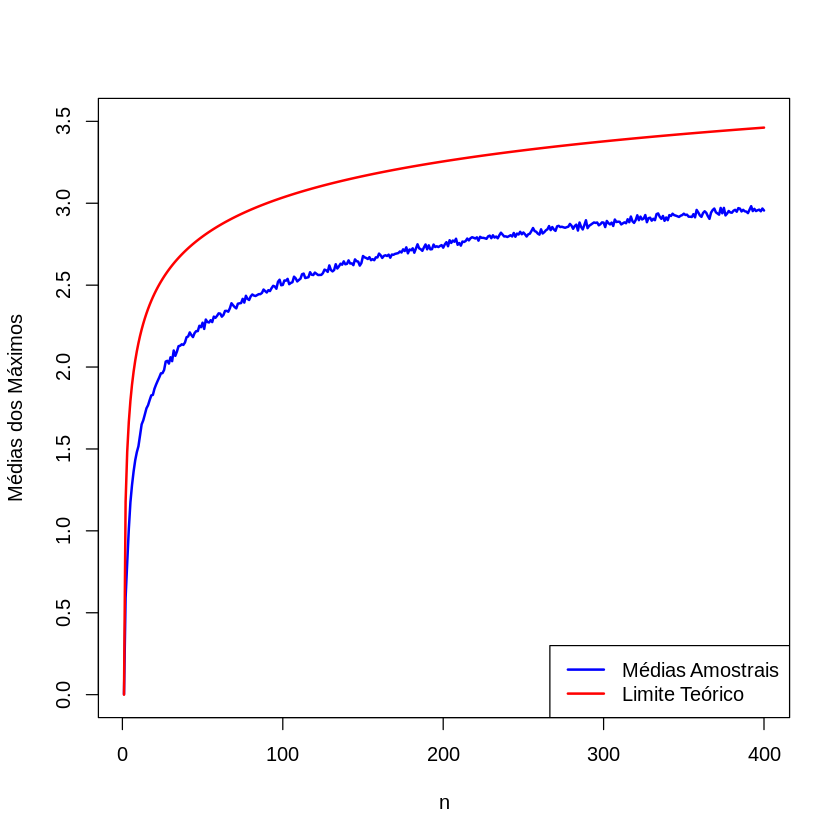

In [ ]:
set.seed(253)

M = 1000
n = 400

med_max <- numeric(n) # vetor pras médias que vão ser geradas pra cada vetor de tamanho 1 a n

for (i in 1:n){
  vet_n <- vector("list", M)  # lista pra guardar os M vetores pra cada tam de 1 a n
  xi_max <- numeric(M) #pra todos os M vet. de tam. 1 a n armazena o maximo

  for (j in 1:M){ # repetindo pra M amostras
    #precisamos colocar valores de X~N(0,1) então vamos gerar a normal por box-muller
    u_1 <- runif(i,0,1) # gera i observações diferentes pra cada tam i de vetor
    u_2 <- runif(i,0,1)
    R <- sqrt(-2*log(u_1))
    theta <- 2*pi*u_2
    x <- R*cos(theta)  #box-muller pode gerar 2 valores de normal mas precisamos de usar apenas 1

    # pra armazenar cada saida x de tamanho 1 a n que vai ser gerada, jogamos esses valores na lista criada
    vet_n[[j]] <- x
    xi_max[j] <- max(vet_n[[j]]) # armazena o valor maximo entre as observações dentro do vetor de tamanho i
  }
  med_max[i] <- mean(xi_max)  #calcula a média dos máximos pra cada vetor de tam i
}

limite_teorico <- sqrt(2*log(1:n))

plot(1:n,med_max,type = "l", col='blue', lwd=2, ylim = c(0,3.5), xlab = "n", ylab = "Médias dos Máximos")
lines(1:n,limite_teorico,col='red', lwd =2)
legend("bottomright", legend = c("Médias Amostrais","Limite Teórico"),
       col=c("blue","red"),lty=c(1, 1), lwd=c(2, 2))

# **Questão 3**

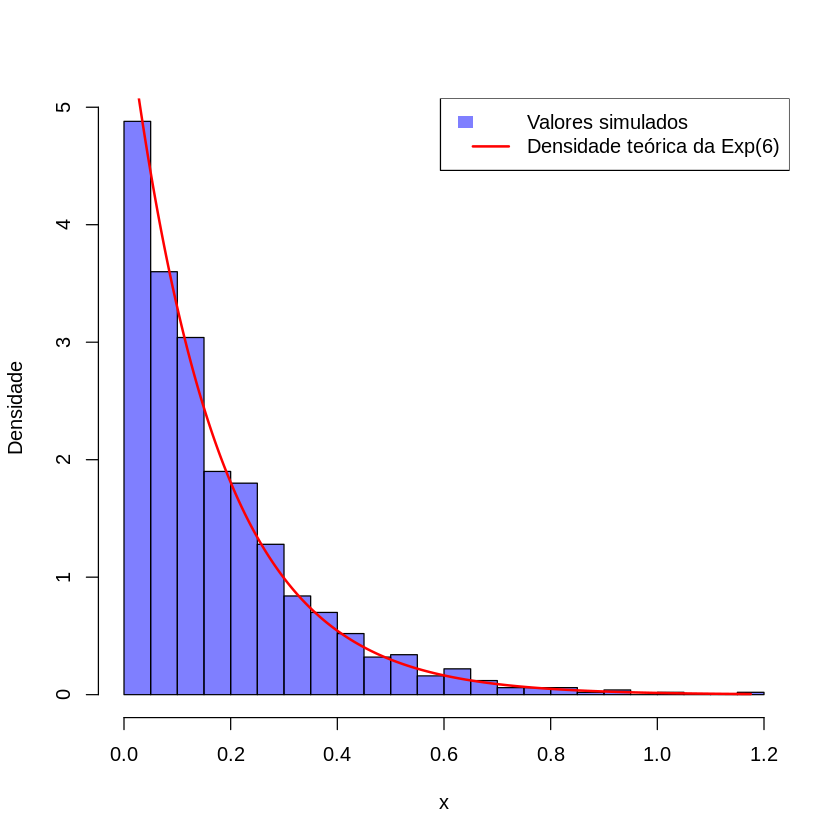

In [ ]:
#Questão 3

set.seed(123)
# Definir tamanho da amostra
M <- 1000

# Definir as taxas das distribuicoes exponenciais
lambda1 <- 1
lambda2 <- 2
lambda3 <- 3
#Somar as taxas
lambda_total <- lambda1 + lambda2 + lambda3

# Método da Inversão para gerar exponenciais
gerar_exponencial <- function(lambda, n) {
  U <- runif(n)  #uniforme (0,1)
  X <- -log(U) / lambda  #inversa da distribuicao exponencial
  return(X)
}

# Gerar amostras usando a inversão
X1 <- gerar_exponencial(lambda1, M)
X2 <- gerar_exponencial(lambda2, M)
X3 <- gerar_exponencial(lambda3, M)

# Calcular o mínimo dos tres valores gerados
X_min <- pmin(X1, X2, X3)
#X_min

# Criar o histograma da distribuição simulada
hist(X_min, breaks = 30, probability = TRUE, col = adjustcolor("blue", alpha.f = 0.5),
     main = "", xlab = "x", ylab = "Densidade")

# Sobrepor a curva teórica da distribuição exponencial
x_valores <- seq(0, max(X_min), length.out = 1000)
dens_teorica <- lambda_total * exp(-lambda_total * x_valores)

lines(x_valores, dens_teorica, col = "red", lwd = 2)  # Curva teórica em vermelho

# Legenda
legend("topright", legend = c("Valores simulados", "Densidade teórica da Exp(6)"),
       fill = c(adjustcolor("blue", alpha.f = 0.5), NA), border = NA, col = c(NA, "red"), lwd = c(NA, 2))


# **Questão 4**

In [ ]:
#Questão 4

# Definir numero de repeticoes
set.seed(189)
N <- 10000

# Inicializar contadores de vitorias
manter <- 0
trocar <- 0

# Definir as tres portas disponiveis
portas <- c(1, 2, 3)

# Simulacao do jogo
for (i in 1:N) {

  # (a) Coloque o carro aleatoriamente atras de uma das 3 portas
  carro <- sample(portas, 1)

  # (b) Jogador escolhe aleatoriamente uma porta
  escolha_jogador <- sample(portas, 1)

  # (c) O apresentador abre uma das outras duas portas, revelando uma cabra
  if (escolha_jogador == carro) {
    # Se o jogador escolheu a porta do carro, o apresentador escolhe aleatoriamente entre as duas portas das cabras
    portas_possiveis <- portas[portas != escolha_jogador]
    porta_aberta <- portas_possiveis[sample(1:2, 1)]
  } else {
    # Se o jogador escolheu uma cabra, o apresentador so pode abrir a outra porta que tem cabra
    for (p in portas) {
      if (p != escolha_jogador && p != carro) {
        porta_aberta <- p
        break
      }
    }
  }

  # (d) Determinar a nova escolha caso o jogador troque
  for (p in portas) {
    if (p != escolha_jogador && p != porta_aberta) {
      nova_escolha <- p
      break
    }
  }


  # Registrar os resultados se o jogador
  #(i)manter
  if (escolha_jogador == carro) {
    manter <- manter + 1  # Jogador venceu mantendo
  }
  #(ii)trocar
  if (nova_escolha == carro) {
    trocar <- trocar + 1  # Jogador venceu trocando
  }
}

# Calcule as proporções de vitoria para ambas as estratégias: manter e trocar.
prob_manter <- manter / N
prob_trocar <- trocar / N

# Exibir os resultados
cat("Probabilidade de ganhar mantendo a escolha:", prob_manter, "\n")
cat("Probabilidade de ganhar trocando de porta:", prob_trocar, "\n")

Probabilidade de ganhar mantendo a escolha: 0.338 
Probabilidade de ganhar trocando de porta: 0.662 


# **Questão 5**

[1] "Mínimo encontrado: x = 3.32360132347143 , f(x) = -45.2492717269664"


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message in geom_point(aes(x = x_min, y = f_min), color = "red", size = 3):
“All aesthetics have length 1, but the data has 100000 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


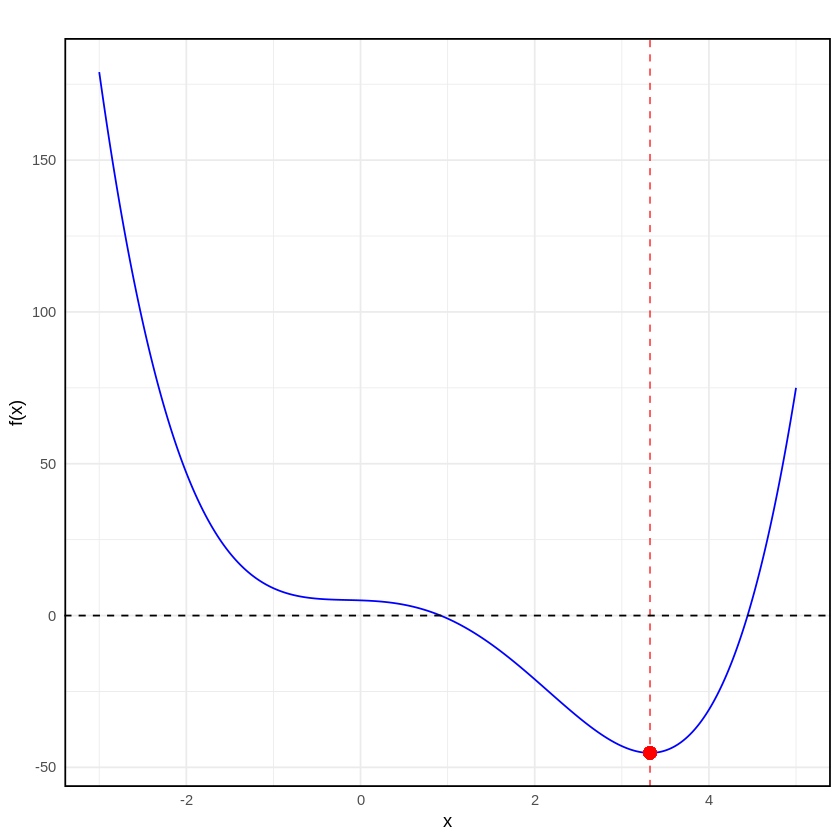

In [ ]:
library(ggplot2)

f <- function(x) {
  return(x^4 - 4*x^3 - 2*x^2 - x + 5)
}

normal <- function(mi, sigma) {
  u1 <- runif(1)
  u2 <- runif(1)
  X <- sqrt(-2 * log(u1)) * cos(2 * pi * u2)
  Y <- sqrt(-2 * log(u1)) * sin(2 * pi * u2)
  return(mi + sigma * X)
}

u<- runif(1)
x_t <- 8*u-3
N <- 10^5
sigma <- 1


values <- c()
k <- c()


for (i in 1:N) {
  values <- c(values, x_t)
  x_lin <- normal(x_t, sigma)
  alpha <- exp(-f(x_lin)) / exp(f(x_t))
  a <- runif(1)

  if (a <= alpha) {
    x_t <- x_lin
  }
}

x_min <- values[which.min(sapply(values, f))]
f_min <- f(x_min)
print(paste("Mínimo encontrado: x =", x_min, ", f(x) =", f_min))

comprimento <- seq(-3, 5, length.out = N)
k <- sapply(comprimento, f)

ggplot(data.frame(x = comprimento, y = k), aes(x = x, y = y)) +
  geom_line(color = "blue", size = 0.5) +
  geom_point(aes(x = x_min, y = f_min), color = "red", size = 3) +
  geom_vline(xintercept = x_min, color = "red", linetype = "dashed", alpha = 0.7) +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed") +
  labs(title = "",
       x = "x",
       y = "f(x)") +
  theme_minimal() +
  theme(legend.position = "bottom",
        panel.border = element_rect(color = "black", fill = NA, size = 1))